In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
df = pd.read_csv('Resources/lending_data.csv')
df.head()

# Review the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [3]:
# There are no nulls in the data set which makes me feel very Happy :)
# No encoding- data is already in numbers  and doesn't need any extra changes


In [4]:
df.describe()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
# We will need a scaler due to the data Varying numericaly 
# Loan Status looks to show the greatest diffrence between the lowest and the highest ammounts 

In [6]:
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [7]:
75036 / 77536

0.9677569129178704

In [8]:
#Imablance between 0 and 1 column. This makes me feel sad :(
#Model will be good at predicting class with more examples (0)
#Will struggle with the smaller of the groups (1)- Tends to focus more on the group with more examples (0)- Justing using 0 will have around 96% Correct predictions
#Need to make both groups more balanced so the model can learn to predict both classes better!
# Solution to use SMOTE: stands for Synthetic Minority Oversampling Technique. It’s a method used to handle class imbalance in datasets by generating new
# artifical examples for the smaller class ( 1) 


### Step 2 Find Coorelations 

In [9]:
# Feature selection
# correlation analysis checks how columns in your data relate to each other.gives you numbers between -1 and 1 to show the strength of the relationship
corrs = df.corr()
corrs


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


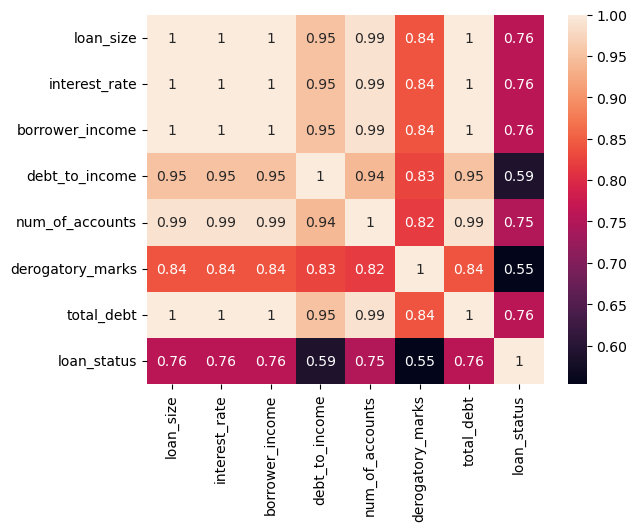

In [10]:
sns.heatmap(corrs, annot=True)
plt.show()

In [11]:
 #Why are there so many 1's :O Crazy (Artifical Dataset?)
 #Strong Linear Coorliatons ( one goes up, the other goes up/one goes down the other goes down)
#multicollinearity- happens when two or more features (columns) in your dataset are too closely related

In [12]:
#Solutions to fix this 
#Regularization: This helps your model deal with multicollinearity by controlling 
#how much it relies on any one feature. It keeps the model simpler and more stable.
#Think of it as teaching the model not to "play favorites" with certain features.

#PCA: This combines related features into fewer, new features that carry the same important information. 
#It’s like summarizing a group of similar features into one, making your dataset smaller but still useful.

### Preprocessing - preparing the data so it’s clean and ready for a machine learning model.

---

In [13]:
df.columns # pull the columns of the data set 

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [14]:
# Remove Loan Status 
num_cols = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

# Create a Standard  Scaler ( Uniform scale)
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data ( means changing it into a cleaner or more useful format)
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [15]:
df_scaled.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


## Machine Learing 

---

In [16]:
# Step 1: SET X AND Y for your train model
X = df_scaled
y = df.loan_status

#This splits your data into two parts:

#Training set (75%): Used to teach the model.

#Testing set (25%): Used to check how well the model learned.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify ensures same % of the target classes in the train/test

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(77536, 7)
(58152, 7)
(19384, 7)


In [17]:
#ROC CURVE- CREATES GRAPH TO SHOW HOW WELL THE MODEL SEPARATES INTO 0 AND 1, 
#WILL HELP US SEE IF THE MODEL MAKES GOOD PREDICTIONS IN BOTH 0 AND 1 GROUPS

#STEP 2- DO CLASSIFCATION- SORTS INTO GROUPS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[55953   324]
 [   34  1841]]
    
    AUC: 0.9941686206916975

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.98      0.91      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.99      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18673    86]
 [   11   614]]
    
    AUC: 0.9969859374167067

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.98      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384

    


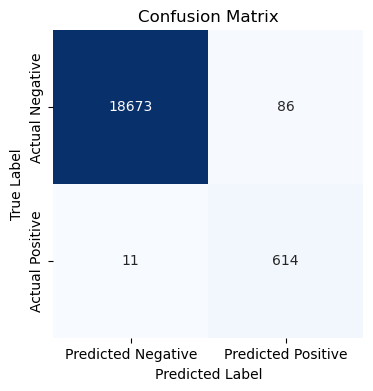

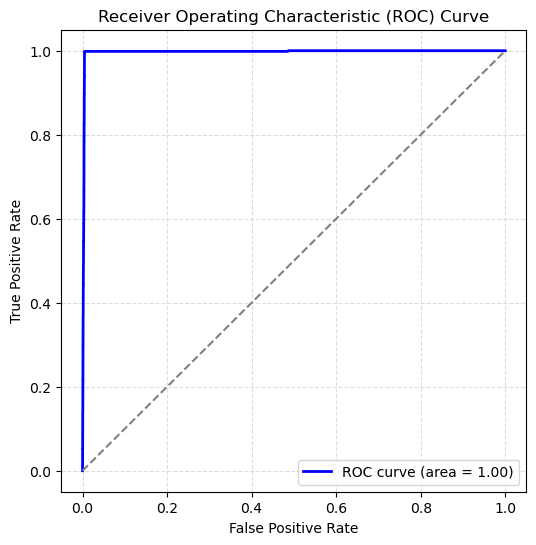

In [18]:
#Create a Logistic Regression model and then using a function to train it and test how well it predicts outcomes.
# lr = LogisticRegression(penalty="l1", solver="liblinear")
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

In [19]:
# Model did a good job at preditcting high accuracy/ distiguishable between the diffrent classes of 0 and 1 
#Both Models had similar Classifcation report as far as acuraccy precentage and averages 

### Descision Tree Model

In [20]:
#Create the Object for the tree/Create the model
dt_model = DecisionTreeClassifier()


In [21]:
#Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [22]:
# use the test data to make predictions 
y_pred = dt_model.predict(X_test)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[18691    68]
 [  110   515]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18759
           1       0.88      0.82      0.85       625

    accuracy                           0.99     19384
   macro avg       0.94      0.91      0.92     19384
weighted avg       0.99      0.99      0.99     19384



 DT model does a good job but not as strong as for Class 0:

Precision (0.89): 89% of predicted "1s" are correct.

Recall (0.83): Captures 83% of actual "1s." more room for improvment for sure!

F1-score (0.85): Balances precision and recall


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**   Both Models did a good job at preditcting high accuracy/ distiguishable between the diffrent classes of 0 and 1 
Both Models had similar Classifcation report as far as acuraccy precentage and averages. The RCA did the best job in determining a degree of accuracy the best between 0 and 1 groups compared to the Descison Tree model I tested.

---